Ça, c'est un travail demandé à l'université.

### importer chaque fichier de données vers un panda dataframe;
### décrire le jeu de données :

a) taille du ou des fichiers ;

b) nombre de données ;

c) nombre d’attributs ;

d) nature des attributs ;

e) expliquer le jeu de données et en particulier chaque attribut ;

f) présence de données manquantes ou aberrantes ;

### préparation du jeu de données :

a) éliminer ou remplacer les données manquantes ou aberrantes ;

b) décrire le nouveau jeu de données ;

c) concaténer les dataframes en un seul, et décrivez-le ;

d) enregistrer le nouveau jeu de données dans un seul fichier ;

### effectuer des visualisations du jeu de données :

a) histogramme des caractéristiques prises individuellement ;

b) proposer si possible des relations entre des couples de caractéristiques en utilisant des

visualisations graphiques (carte de chaleur, nuage de points);

ici j'importe les bibliotheuqes que je vais utiliser dans mon code

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

### 1. importer chaque fichier de données vers un panda dataframe

In [33]:
data2020 = pd.read_csv("Covid_algeria_2020.csv")
data2020
df1 = pd.DataFrame(data2020)

data2021 = pd.read_csv("Covid_algeria_2021.csv")
data2021
df2 = pd.DataFrame(data2021)

2. décrire le jeu de données :
- taille du ou des fichiers ;
- nombre de données ;
- nombre d’attributs ;
- nature des attributs ;
- expliquer le jeu de données et en particulier chaque attribut ;
- présence de données manquantes ou aberrantes ;

In [34]:
df1.memory_usage().sum()

29988

In [35]:
# nombre de données :
print("la taille de dataset 2020 est :" , df1.size)
print("\n")
print("la taille de dataset 2022 est :" , df2.size)

la taille de dataset 2020 est : 3732


la taille de dataset 2022 est : 2640


In [36]:
# nombre d'attributs :
print("nombre de lignes de dataset 2020 est :" , df1.shape[0])
print("nombre de colonnes de dataset 2020 est :" , df1.shape[1])
print("\n")
print("nombre de lignes de dataset 2021 est :" , df2.shape[0])
print("nombre de colonnes de dataset 2021 est :" , df2.shape[1])

# les colonnes de dataset 2020 et 2021
print("les colonnes de dataset 2020 :",df1.columns)
print("\n")
print("les colonnes de dataset 2021 :",df2.columns)

nombre de lignes de dataset 2020 est : 311
nombre de colonnes de dataset 2020 est : 12


nombre de lignes de dataset 2021 est : 220
nombre de colonnes de dataset 2021 est : 12
les colonnes de dataset 2020 : Index(['Unnamed: 0', 'date', 'temp', 'weather', 'Country_Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')


les colonnes de dataset 2021 : Index(['Unnamed: 0', 'date', 'temp', 'weather', 'Country_Region',
       'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')


In [37]:
# nature d'attibuts
print(df1.dtypes)
print("\n")
print(df2.dtypes)
# on a 3 types :
# object
# int64
# float64

Unnamed: 0               int64
date                    object
temp                    object
weather                 object
Country_Region          object
Last Update             object
Confirmed                int64
Deaths                   int64
Recovered                int64
Active                 float64
Incident_Rate          float64
Case_Fatality_Ratio    float64
dtype: object


Unnamed: 0               int64
date                    object
temp                    object
weather                 object
Country_Region          object
Last_Update             object
Confirmed                int64
Deaths                   int64
Recovered              float64
Active                 float64
Incident_Rate          float64
Case_Fatality_Ratio    float64
dtype: object


### Éxpliquation :
-**Unnamed: 0** : c'est une colonne qui est résponsable de l'identification de notre données de type int.

-**date** : est une colonne qui contient les dates de chaque jour de type object (on doit la convertir vers datetime64)

-**temp** : la température d'une journée en celcius entre 11 et 34 degrées de type object (on doit la convertir vers int64)

-**weather** : le climat d'une journée qui contient X types (Fog, Light rain Overcast, Light rain Partly sunny, Thundershowers Overcast, Passing clouds,Scattered clouds,Sunny,Partly sunny, Overcast)

-**contry_region** : une colonne qui contient la région ou on a  prenais la temperature , le climat et les autres informations.

-**Last Update** : le temps de la dérniere mise a jour

-**Confirmed** : le nombre de cas confirmées

-**Deaths** : nombre de décés

-**Recovered** : nombre de cas non morts

-**Active** : nombre de pations malade

-**Incident_Rate** : le nombre de nouveau cas de la maladie divisé par le nombre de personnes risqué d'avoire la maladie

-**Case_Fatality_Ratio** : Proportion de personnes décédées d'une maladie spécifique parmi tous les individus diagnostiqués avec cette maladie sur une certaine période de temps.

In [38]:
print(df1.describe())
print("\n")
print(df2.describe())

       Unnamed: 0     Confirmed       Deaths     Recovered        Active  \
count  311.000000    311.000000   311.000000    311.000000    285.000000   
mean   189.000000  34030.144695  1214.810289  22967.318328  10744.122807   
std     89.922189  30234.222188   816.683817  20363.549625   9057.734357   
min     34.000000      1.000000     0.000000      0.000000    119.000000   
25%    111.500000   6160.000000   518.500000   3028.000000   2730.000000   
50%    189.000000  29229.000000  1186.000000  19592.000000   9619.000000   
75%    266.500000  53680.500000  1827.000000  37603.000000  14719.000000   
max    344.000000  99610.000000  2756.000000  67127.000000  29727.000000   

       Incident_Rate  Case_Fatality_Ratio  
count      53.000000            53.000000  
mean      192.710762             2.933269  
std        26.331016             0.160197  
min       142.968093             2.766790  
25%       170.718858             2.805415  
50%       199.543714             2.858220  
75%    

### présence de données manquantes

In [39]:
print('données manquantes de dataset 2020 :')
print(df1.isna().sum())
print('données manquantes de dataset 2021 :')
print(df2.isna().sum())

données manquantes de dataset 2020 :
Unnamed: 0               0
date                     0
temp                    18
weather                 18
Country_Region           0
Last Update            285
Confirmed                0
Deaths                   0
Recovered                0
Active                  26
Incident_Rate          258
Case_Fatality_Ratio    258
dtype: int64
données manquantes de dataset 2021 :
Unnamed: 0             0
date                   0
temp                   3
weather                3
Country_Region         0
Last_Update            0
Confirmed              0
Deaths                 0
Recovered              4
Active                 4
Incident_Rate          0
Case_Fatality_Ratio    0
dtype: int64


Text(0.5, 1.0, 'Distribution de COVID-19')

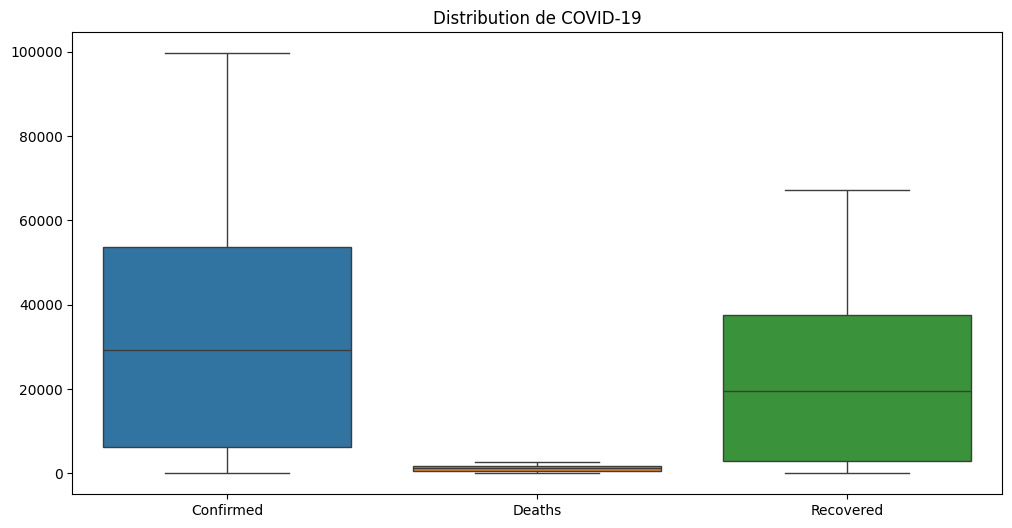

In [40]:
# vérification pour les données abérrantes avec la méthode de visualisation données 2020
plt.figure(figsize=(12,6))
sns.boxplot(data=df1[['Confirmed', 'Deaths', 'Recovered']])
plt.title('Distribution de COVID-19')

Text(0.5, 1.0, 'Distribution de COVID-19')

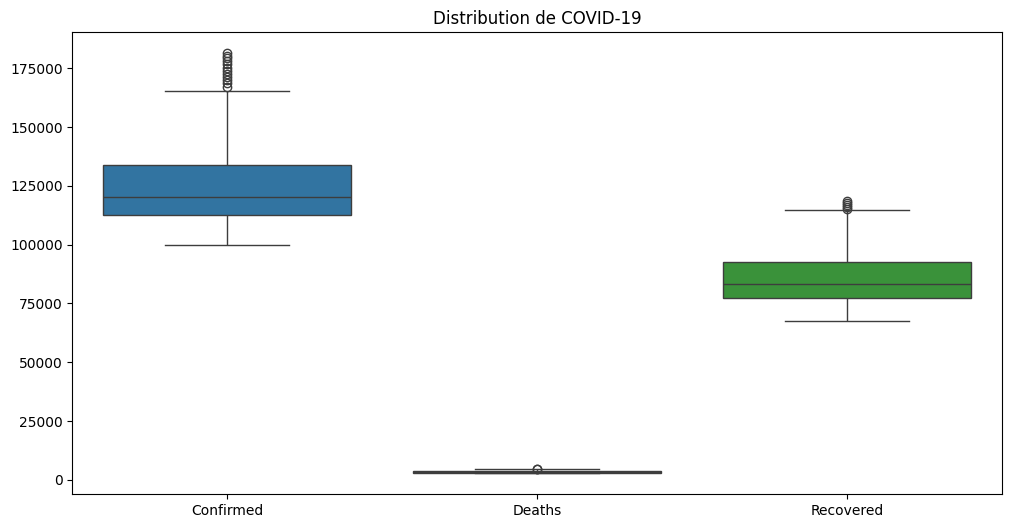

In [41]:
# vérification pour les données abérrantes avec la méthode de visualisation données 2021
plt.figure(figsize=(12,6))
sns.boxplot(data=df2[['Confirmed', 'Deaths', 'Recovered']])
plt.title('Distribution de COVID-19')

dans les données de l'année 2021 les données apparait abbérantes en raison de leur grande plage de variation mais en vérité les données sont correctes car la pendémie a vu son peak durant l'année 2021 alors aucune modification sera prete sur ces données

### Présence de données manquantes

In [42]:
print(df1.isna().any(axis=1))
print("\n")
print(df2.isna().any(axis=1))
#d'aprés l'affichage on a plein de données manquantes

0      True
1      True
2      True
3      True
4      True
       ... 
306    True
307    True
308    True
309    True
310    True
Length: 311, dtype: bool


0      False
1      False
2      False
3      False
4      False
       ...  
215     True
216     True
217     True
218     True
219     True
Length: 220, dtype: bool


### Présence de données abérrantes

In [43]:
# vérification pour les données abérrantes avec la méthode de IQR
def trouver_aberrant(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    a = column[(column < lower) | (column > upper)]
    if a.empty:
        return "Pas de données aberrantes"
    else:
        return a

print('données abberantes de 2020')
print(trouver_aberrant(df1.Deaths))
print("\n")
print('données abberantes de 2021')
print(trouver_aberrant(df2.Deaths))

données abberantes de 2020
Pas de données aberrantes


données abberantes de 2021
216    4520
219    4550
Name: Deaths, dtype: int64


### préparation du jeu de données : 
#### a) éliminer ou remplacer les données manquantes ou aberrantes :
- J'ai décidé de supprimer la première colonne, car elle contient simplement une liste d'identifiants que pandas génère automatiquement.
- Je supprime également la colonne "country_region", car tous les cas sont enregistrés en Algérie.
- Aussi la colonne "Last Update" a cause du manque de données (+90% manquantes)
- La colonne "Active" est calculée comme suit :  **confirmed - (recovered + deaths)** .
- La colonne "Incident_Rate" est calculée comme suit :  **(confirmed / population_algerie) * 1000000** .
- La colonne "Case_Fatality" est calculée comme suit :  **(deaths / confirmed) * 100** .
- j'ai réglé la cohérence des dates.
- j'ai changer le type de la colonne "date" et "last update" et trier le dataframe par rapport a la date.
- j'ai modifié la colonne "temp" ou j'ai enlevé(°C) et converti en nombres réels

on remarque qu'il nous manque les 4 dernieres valeurs dans les données de 2021 dans les colonnes "recovered" et "active" alors je vais les remplir par la variation moyenne quotidienne des 5 derniers jours

In [44]:
df1.drop(df1.columns[df1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

del df1["Country_Region"]
del df2["Country_Region"]
del df1["Last Update"]
del df2["Last_Update"]

df1["Active"] = df1['Confirmed'] - (df1['Deaths'] + df1['Recovered'])
df1["Case_Fatality_Ratio"] = (df1["Deaths"] / df1["Confirmed"]) * 100

population_algerie = 438510429
df1["Incident_Rate"] =  (df1["Confirmed"] / population_algerie) * 1000000

# la représentation des dates
for i in range(len(df1["date"])):
    date = df1.loc[i, "date"]
    if len(date) == 8:
        date = date[:6] + "20" + date[6:]
    df1.loc[i, "date"] = datetime.strptime(date, '%m-%d-%Y').date()

for i in range(len(df2["date"])):
    date = df2.loc[i, "date"]
    if len(date) == 8:
        date = date[:6] + "20" + date[6:]
    df2.loc[i, "date"] = datetime.strptime(date, '%m-%d-%Y').date()

# Convertir le type de "date"
df1["date"] = pd.to_datetime(df1["date"])
df1 = df1.sort_values(by="date")
df1 = df1.reset_index(drop=True)

df2["date"] = pd.to_datetime(df2["date"])
df2 = df2.sort_values(by="date")
df2 = df2.reset_index(drop=True)


diff_jour = df2['Recovered'].diff().mean()
derniere_valeur = df2['Recovered'].iloc[-5]
for i in range(1, 5):
    df2.loc[df2['Recovered'].index[-5 + i], 'Recovered'] = round(derniere_valeur + i * diff_jour)


df2["Case_Fatality_Ratio"] = (df2["Deaths"] / df2["Confirmed"]) * 100
df2["Incident_Rate"] =  (df2["Confirmed"] / population_algerie) * 1000000
df2["Active"] = df2['Confirmed'] - (df2['Deaths'] + df2['Recovered'])

In [45]:
df1['weather'] = df1['weather'].fillna(df1['weather'].mode()[0])
df1['temp'] = df1['temp'].astype(str).str.extract(r'(\d+)').astype(float)
df1['temp'] = df1['temp'].interpolate(method='linear')

df2['weather'] = df2['weather'].fillna(df2['weather'].mode()[0])
df2['temp'] = df2['temp'].astype(str).str.extract(r'(\d+)').astype(float)
df2['temp'] = df2['temp'].interpolate(method='linear')

### Déscription du nouveau jeu de données
-date : est une colonne qui contient les dates de chaque jour de type datetime64.

-temp : la température d'une journée en celcius entre 11 et 34 degrées ou on a remplis les données manquantes par la méthode de l'Interpolation temporelle , son type est float64.

-weather : le climat d'une journée qui contient X types (Fog, Light rain Overcast, Light rain Partly sunny, Thundershowers Overcast, Passing clouds,Scattered clouds,Sunny,Partly sunny, Overcast) remplit les données manquantes par la valeur la plus fréquente (mode).

-Confirmed : le nombre de cas confirmées , type int

-Deaths : nombre de décés , type int

-Recovered : nombre de cas non morts , type int

-Active : nombre de pations malade , type int

-Incident_Rate : le nombre de nouveau cas de la maladie divisé par le nombre de personnes risqué d'avoir la maladie

-Case_Fatality_Ratio : Proportion de personnes décédées d'une maladie spécifique parmi tous les individus diagnostiqués avec cette maladie sur une certaine période de temps.

###

In [46]:
df = pd.concat([df1, df2], ignore_index=True)
df.to_csv('Covid_2020_2021.csv', index=False)

In [47]:
df.head()

,date,temp,weather,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,2020-02-25,15.0,Passing clouds,1,0,0.0,1.0,0.00228,0.0
1,2020-02-26,18.0,Scattered clouds,1,0,0.0,1.0,0.00228,0.0
2,2020-02-27,17.0,Passing clouds,1,0,0.0,1.0,0.00228,0.0
3,2020-02-28,20.0,Sunny,1,0,0.0,1.0,0.00228,0.0
4,2020-02-29,19.0,Scattered clouds,1,0,0.0,1.0,0.00228,0.0


# Visualisations

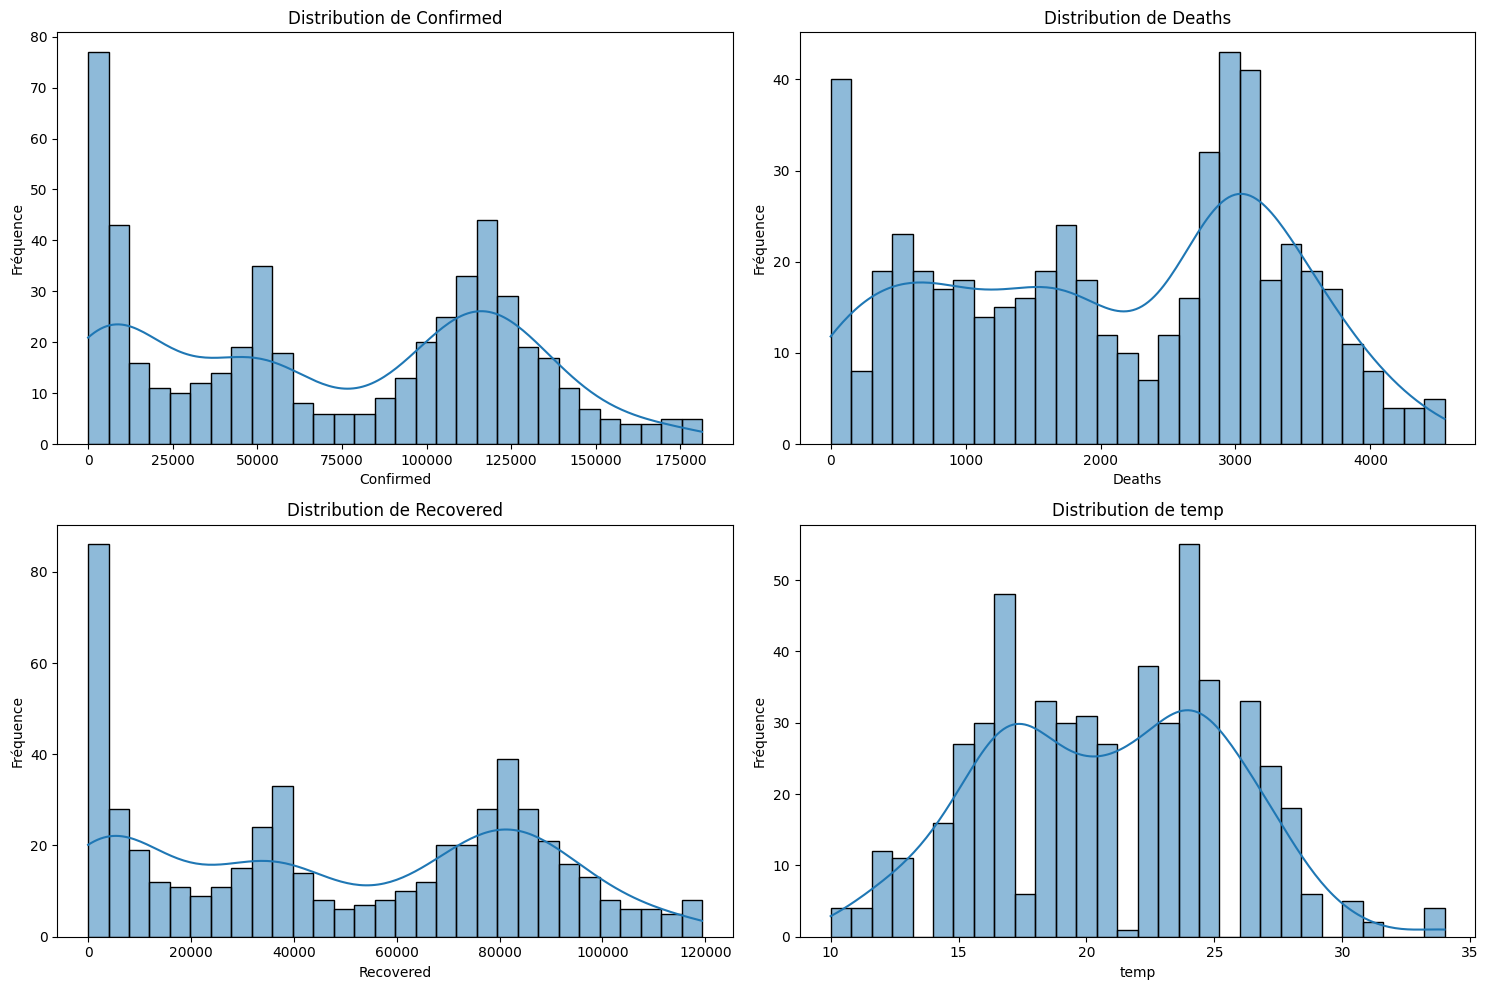

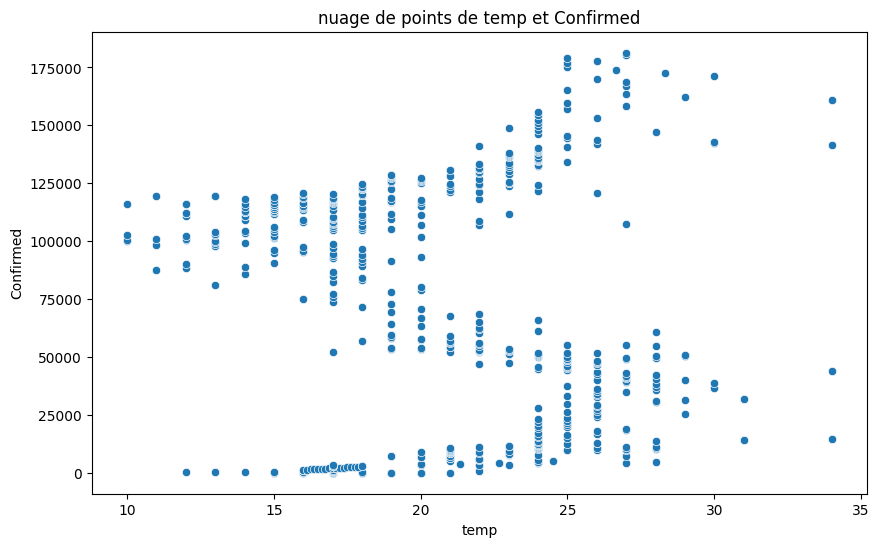

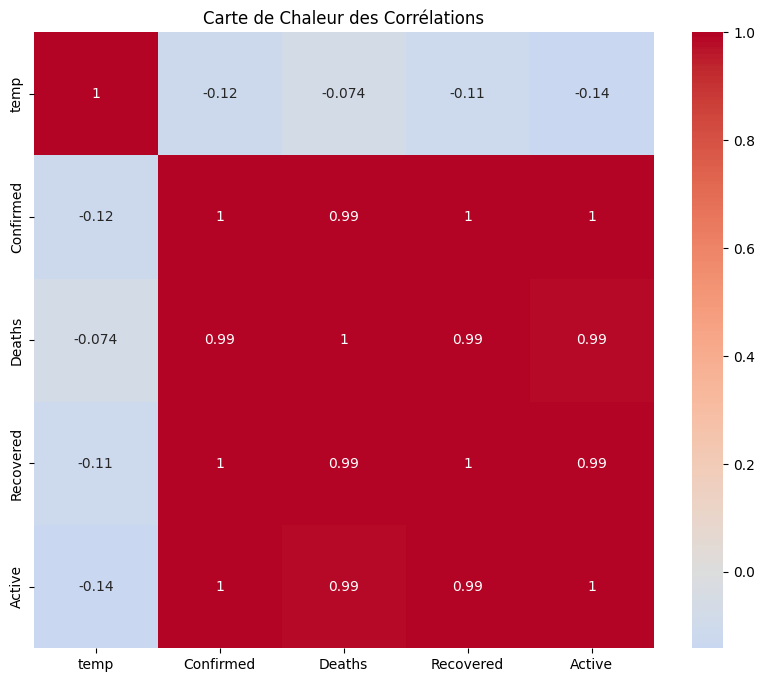

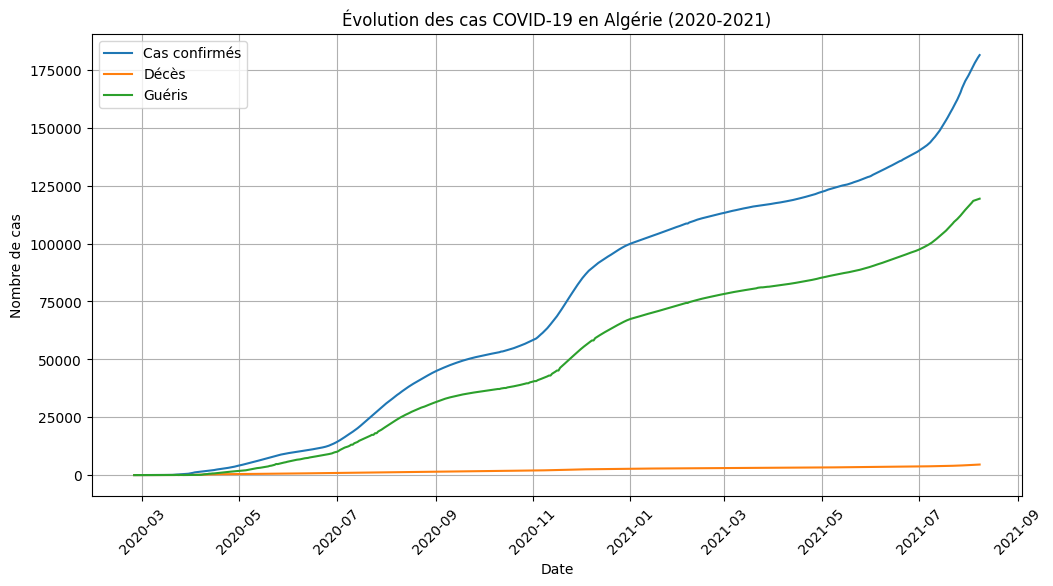

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fonction pour les histogrammes
def tracer_histogrammes(df, colonnes, bins=30, taille_figure=(15, 10)):
    plt.figure(figsize=taille_figure)
    nombre_graphiques = len(colonnes)
    i = 1
    for colonne in colonnes:
        plt.subplot(nombre_graphiques // 2 + nombre_graphiques % 2, 2, i)
        sns.histplot(df[colonne], bins=bins, kde=True)
        plt.title(f'Distribution de {colonne}')
        plt.xlabel(colonne)
        plt.ylabel('Fréquence')
        i += 1
    plt.tight_layout()
    plt.show()
    i = i + 1

# Fonction pour les nuages de points
def tracer_nuage_points(df, colonne_x, colonne_y, taille_figure=(10, 6)):
    plt.figure(figsize=taille_figure)
    sns.scatterplot(x=df[colonne_x], y=df[colonne_y])
    plt.title(f'nuage de points de {colonne_x} et {colonne_y}')
    plt.xlabel(colonne_x)
    plt.ylabel(colonne_y)
    plt.show()

# Fonction pour la carte de chaleur
def tracer_carte_chaleur(df, colonnes, taille_figure=(10, 8)):
    plt.figure(figsize=taille_figure)
    correlation = df[colonnes].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title('Carte de Chaleur des Corrélations')
    plt.show()



# Fonction pour créer un graphique d'évolution temporelle
def tracer_evolution(df):
    plt.figure(figsize=(12, 6))
    
    plt.plot(df['date'], df['Confirmed'], label='Cas confirmés')
    plt.plot(df['date'], df['Deaths'], label='Décès')
    plt.plot(df['date'], df['Recovered'], label='Guéris')
    
    plt.title('Évolution des cas COVID-19 en Algérie (2020-2021)')
    plt.xlabel('Date')
    plt.ylabel('Nombre de cas')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# Exemple d'utilisation
tracer_histogrammes(df, colonnes=['Confirmed', 'Deaths', 'Recovered', 'temp'])
tracer_nuage_points(df, colonne_x='temp', colonne_y='Confirmed')
tracer_carte_chaleur(df, colonnes=['temp', 'Confirmed', 'Deaths', 'Recovered', 'Active'])
tracer_evolution(df)